In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
housing = pd.read_csv('c:/Users/Junaid/Documents/handson-ml/datasets/housing/housing.csv')

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


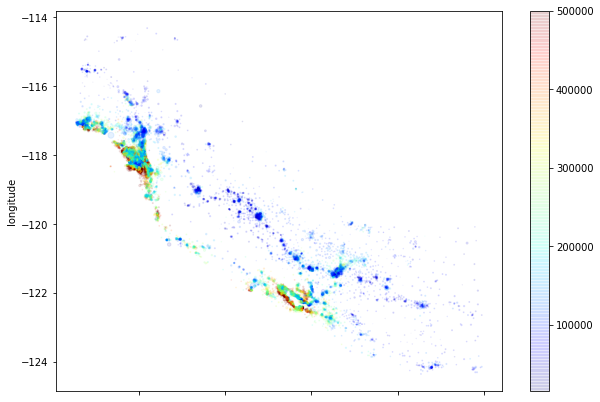

In [60]:
housing.plot(x='latitude', y='longitude', kind='scatter', alpha=0.1, c=housing['median_house_value'], s=housing['population']/1000, cmap=plt.get_cmap('jet'), figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C49E22470>,
      dtype=object)

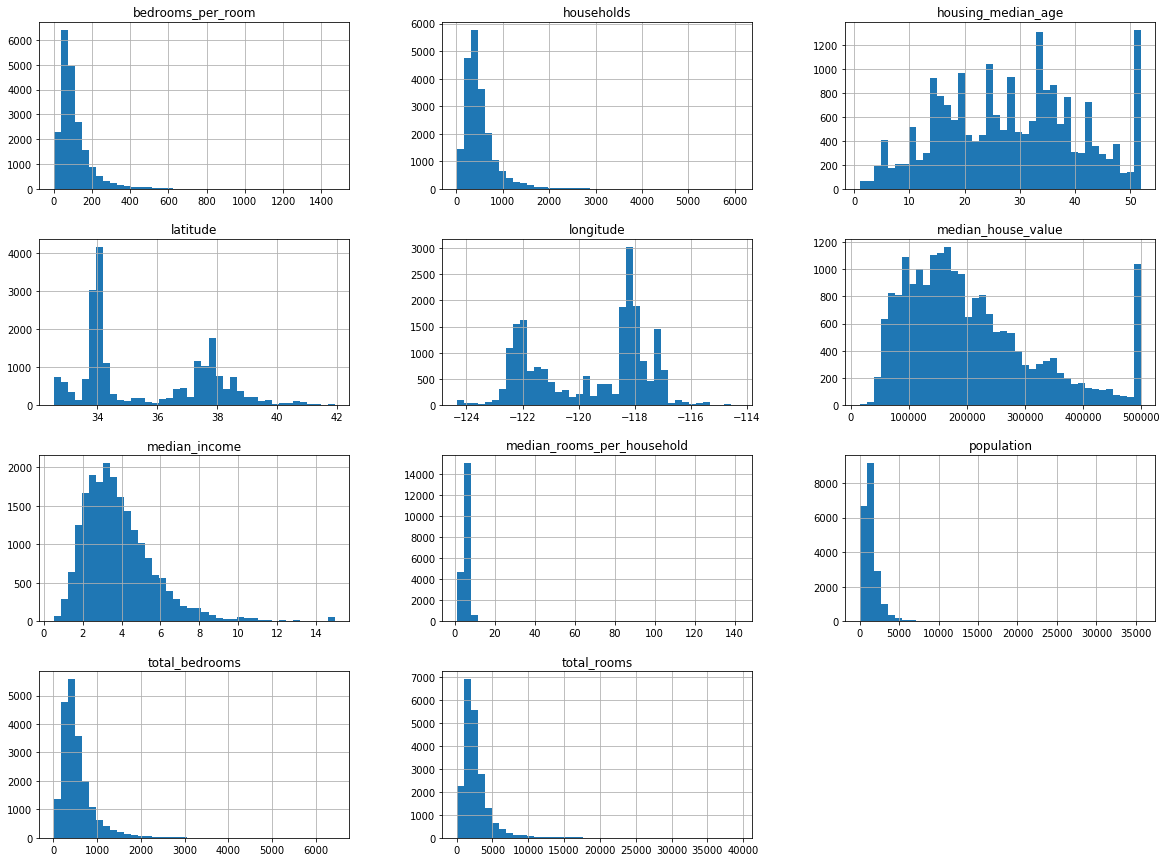

In [61]:
housing.hist(figsize=(20,15), bins=40)

In [63]:
import numpy as np
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

In [64]:
housing['income_cat'].head()

0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

In [65]:
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)

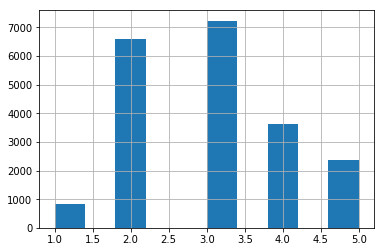

In [67]:
housing['income_cat'].hist()

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [69]:
strat_train_set.drop('income_cat', axis=1, inplace=True)

In [78]:
strat_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_rooms_per_household',
       'bedrooms_per_room'],
      dtype='object')

In [79]:
housing = strat_train_set.copy()

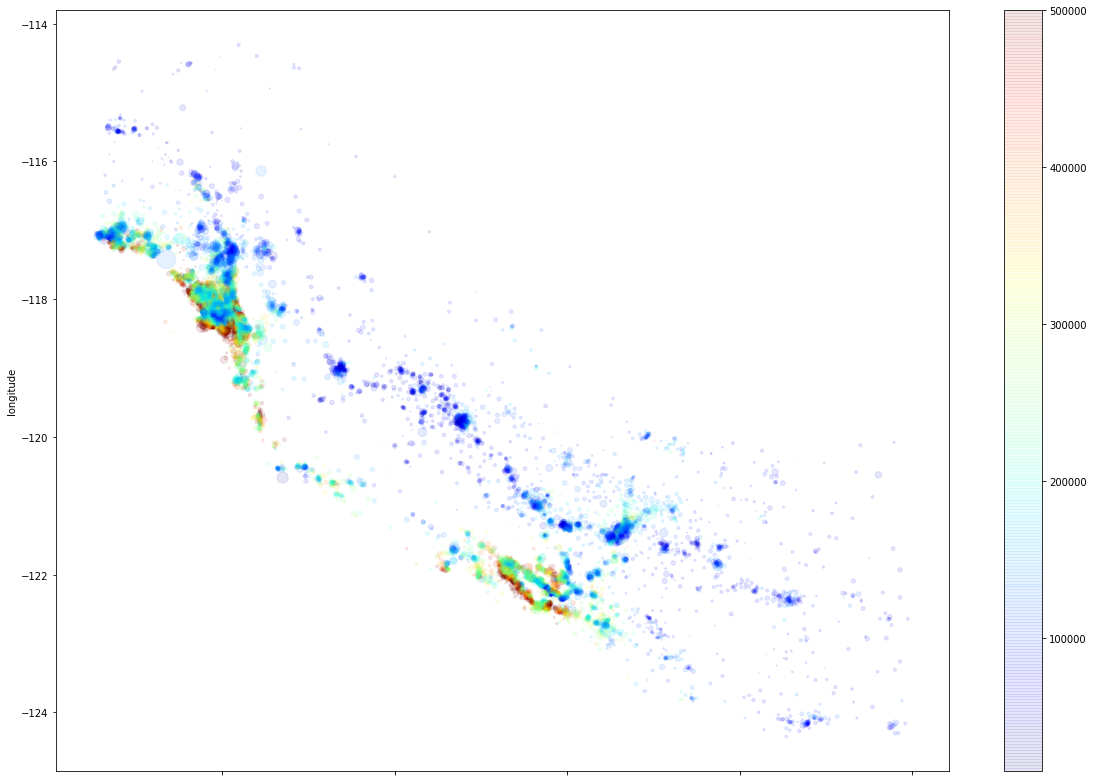

In [89]:
housing.plot(kind='scatter', x='latitude', y='longitude', alpha=0.1, c=housing['median_house_value'], s=housing['population']/100, figsize=(20, 14), cmap=plt.get_cmap('jet'))

In [96]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.687160
median_rooms_per_household    0.146285
total_rooms                   0.135097
housing_median_age            0.114110
households                    0.064506
total_bedrooms                0.047689
bedrooms_per_room            -0.006566
population                   -0.026920
longitude                    -0.047432
latitude                     -0.142724
Name: median_house_value, dtype: float64

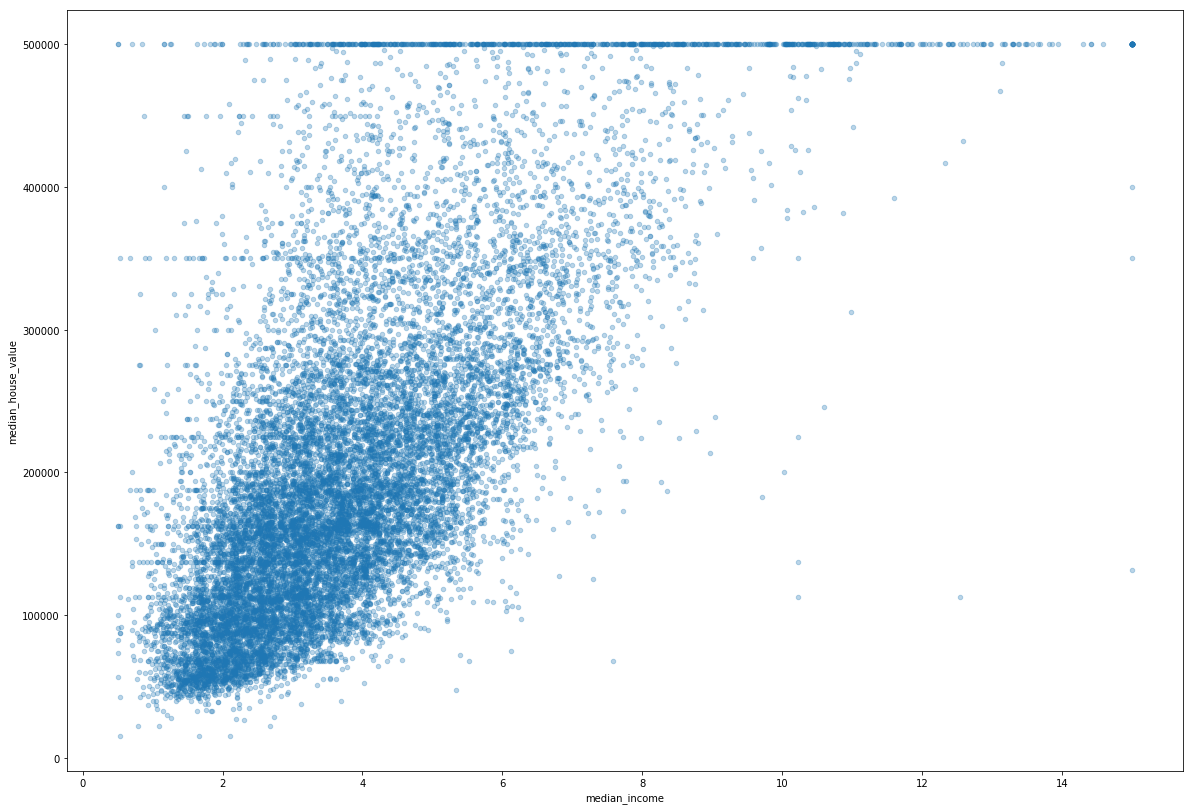

In [102]:

housing.plot(x='median_income', y='median_house_value', alpha=0.3, kind='scatter', figsize=(20, 14))

In [104]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [107]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.687160
rooms_per_household           0.146285
median_rooms_per_household    0.146285
total_rooms                   0.135097
housing_median_age            0.114110
households                    0.064506
total_bedrooms                0.047689
population_per_household     -0.021985
population                   -0.026920
longitude                    -0.047432
latitude                     -0.142724
bedrooms_per_room            -0.259984
Name: median_house_value, dtype: float64

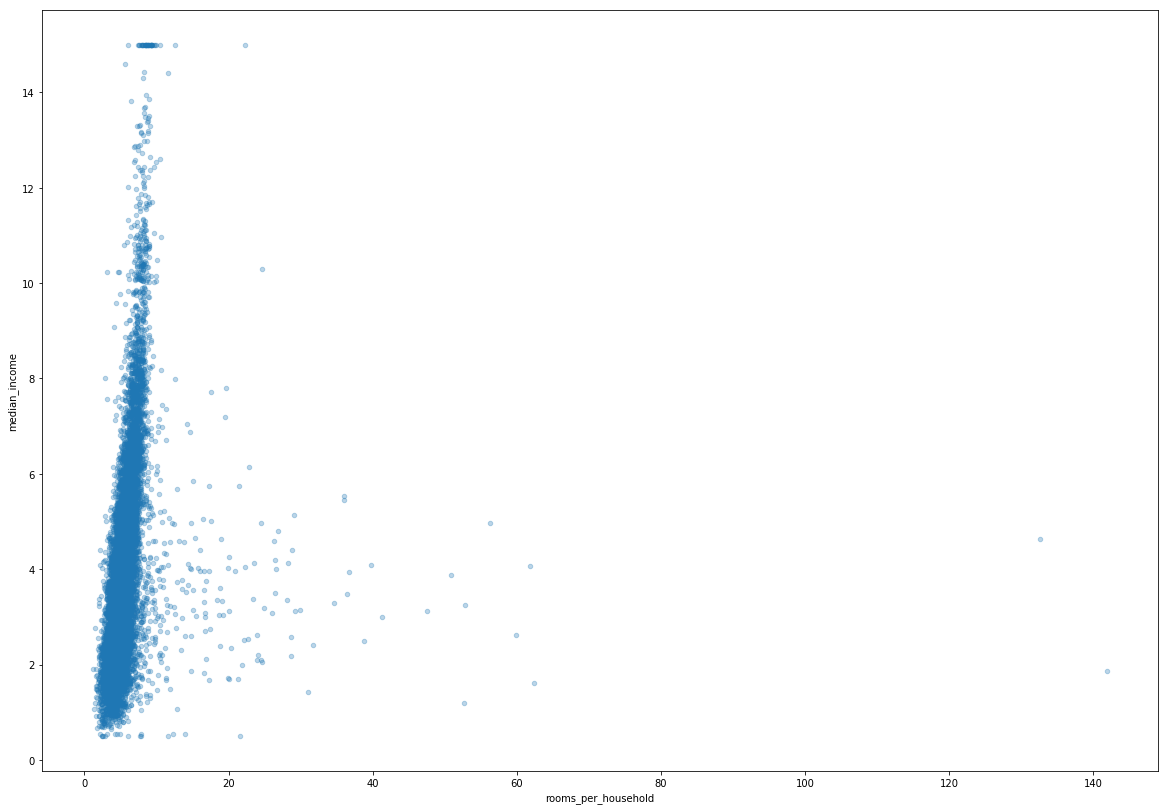

In [112]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [114]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [116]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [118]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [120]:
imputer.statistics_

array([-118.51      ,   34.26      ,   29.        , 2119.5       ,
        433.        , 1164.        ,  408.        ,    3.5409    ,
          5.23228423,   82.9709447 ])

In [125]:
housing_num.median().values

array([-118.51      ,   34.26      ,   29.        , 2119.5       ,
        433.        , 1164.        ,  408.        ,    3.5409    ,
          5.23228423,   82.9709447 ])

In [126]:
X = imputer.transform(housing_num)

In [128]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns, index=list(housing.index.values))

In [132]:
list(housing.index.values)

[17606,
 18632,
 14650,
 3230,
 3555,
 19480,
 8879,
 13685,
 4937,
 4861,
 16365,
 19684,
 19234,
 13956,
 2390,
 11176,
 15614,
 2953,
 13209,
 6569,
 5825,
 18086,
 16718,
 13600,
 13989,
 15168,
 6747,
 7398,
 5562,
 16121,
 18104,
 2651,
 12963,
 12622,
 3671,
 10461,
 12479,
 15126,
 9124,
 7707,
 3683,
 11274,
 4058,
 16984,
 15318,
 11077,
 20630,
 17899,
 7247,
 18047,
 663,
 1968,
 17625,
 2007,
 9460,
 17510,
 3031,
 9564,
 16131,
 533,
 1537,
 12779,
 2818,
 13495,
 4577,
 2381,
 2659,
 19960,
 5851,
 7304,
 10197,
 4789,
 2057,
 10449,
 9551,
 7138,
 9922,
 7130,
 2432,
 3777,
 2994,
 1286,
 14561,
 12100,
 3070,
 5645,
 7968,
 4278,
 11130,
 17791,
 7539,
 8851,
 17137,
 17515,
 20349,
 2011,
 8887,
 18265,
 15117,
 8741,
 15706,
 5505,
 19422,
 460,
 11723,
 1879,
 7912,
 19985,
 18583,
 4598,
 13962,
 2370,
 13089,
 4629,
 4547,
 20440,
 6068,
 6959,
 18168,
 1297,
 16535,
 1844,
 17835,
 15384,
 18068,
 9050,
 17764,
 15165,
 16478,
 16742,
 6950,
 12949,
 7747,
 1147,

In [131]:
housing.index.values

array([17606, 18632, 14650, ..., 13908, 11159, 15775], dtype=int64)

In [133]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [134]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+['rooms_per_household', 'population_per_household'])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_rooms_per_household,bedrooms_per_room,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,75.8858,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,17.9735,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,111.476,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,70.9058,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,338.452,4.50581,3.04785


In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [136]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [141]:
from future_encoders import ColumnTransformer, OneHotEncoder

In [142]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)


In [145]:
housing_prepared[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.34321584,
       -0.31205452, -0.08649871,  0.15531753,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [147]:
housing_prepared.shape

(16512, 18)

In [148]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:', lin_reg.predict(some_data_prepared))
print('labels', list(some_labels))

predictions: [210603.45389216 317357.62444274 210504.56828604  59951.82910306
 184040.08555161]
labels [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [151]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68487.43237728262

In [152]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [153]:
housing_predictions = tree_reg.predict(housing_prepared)


In [155]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
sum(tree_rmse_scores)/len(tree_rmse_scores)

71362.50552893148